In [0]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers

In [0]:


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
print('Training data')
print('Shape of train_images:' ,train_images.shape)
print('Shape of train_labels:' ,train_labels.shape)
print('Shape of test_images:' ,test_images.shape)
print('Shape of test_labels:', test_labels.shape)


Training data
Shape of train_images: (50000, 32, 32, 3)
Shape of train_labels: (50000, 1)
Shape of test_images: (10000, 32, 32, 3)
Shape of test_labels: (10000, 1)


In [0]:

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:


model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

In [0]:


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 13s 319us/step - loss: 1.8460 - acc: 0.3289 - val_loss: 1.6342 - val_acc: 0.4123
Epoch 2/50
40000/40000 [==============================] - 12s 310us/step - loss: 1.5395 - acc: 0.4438 - val_loss: 1.4618 - val_acc: 0.4722
Epoch 3/50
40000/40000 [==============================] - 12s 303us/step - loss: 1.4096 - acc: 0.4957 - val_loss: 1.4240 - val_acc: 0.4959
Epoch 4/50
40000/40000 [==============================] - 12s 304us/step - loss: 1.3170 - acc: 0.5319 - val_loss: 1.2806 - val_acc: 0.5465
Epoch 5/50
40000/40000 [==============================] - 12s 303us/step - loss: 1.2412 - acc: 0.5611 - val_loss: 1.2118 - val_acc: 0.5787
Epoch 6/50
40000/40000 [==============================] - 12s 299us/step - loss: 1.1787 - acc: 0.5870 - val_loss: 1.1983 - val_acc: 0.5867
Epoch 7/50
40000/40000 [==============================] - 12s 288us/step - loss: 1.1220 - acc: 0.6088 - val_loss: 1.

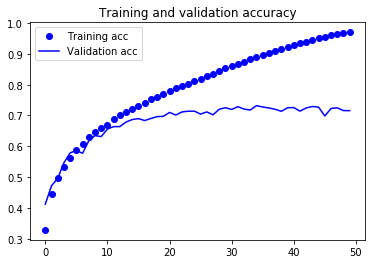

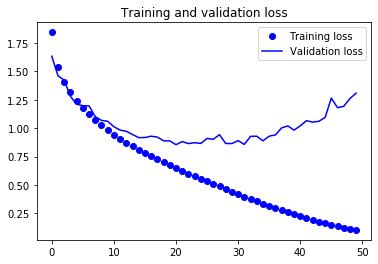

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 135us/step


In [0]:
test_acc

0.7066